### Sentiment Analysis Notebook
This notebook performs **sentiment analysis** on bank reviews using **HuggingFace DistilBERT** and provides visualizations.
### Features:
- Dynamic import of `SentimentAnalyzer` class
- Sentiment analysis using HuggingFace pipeline
- Visualizations:
  - Overall sentiment distribution
  - Sentiment distribution by bank
  - Sentiment score histogram

In [1]:
import sys
from pathlib import Path
import importlib.util
import matplotlib.pyplot as plt
import seaborn as sns

# Locate project root and add src to sys.path
cwd = Path.cwd()
project_root = cwd.parent if cwd.name == "notebooks" else next((p for p in cwd.parents if (p / "src").exists()), cwd)
SRC_DIR = project_root / "src"
print(f"Project root: {project_root}")
print(f"Adding src to sys.path: {SRC_DIR}")
sys.path.insert(0, str(SRC_DIR))

# Validate and import sentiment_analyzer.py
sentiment_file = SRC_DIR / "sentiment_analyzer.py"
if not sentiment_file.exists():
    raise FileNotFoundError(f"Expected file not found: {sentiment_file}")

module_name = "sentiment_analyzer"
try:
    sentiment_mod = importlib.import_module(module_name)
    print(f"Imported module '{module_name}' normally.")
except Exception as e:
    print(f"Normal import failed ({e}). Loading from file.")
    spec = importlib.util.spec_from_file_location(module_name, str(sentiment_file))
    sentiment_mod = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(sentiment_mod)
    sys.modules[module_name] = sentiment_mod
    print(f"Loaded module '{module_name}' from {sentiment_file}")

# Expose SentimentAnalyzer class
if hasattr(sentiment_mod, "SentimentAnalyzer"):
    SentimentAnalyzer = sentiment_mod.SentimentAnalyzer
    print("SentimentAnalyzer is ready to use.")
else:
    raise ImportError("'SentimentAnalyzer' not found in sentiment_analyzer.py.")

# Run sentiment analysis
analyzer = SentimentAnalyzer()
df = analyzer.run()  # HuggingFace-based analysis
#display(df.head())

selected_df=df[['review_text', 'bank_name', 'rating', 'sentiment_label', 'sentiment_score']]
display(selected_df.head(10))

Project root: c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews
Adding src to sys.path: c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\src


c:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Imported module 'sentiment_analyzer' normally.
SentimentAnalyzer is ready to use.
Loading sentiment analysis model...


Device set to use cpu


Loading processed reviews from C:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\data\processed\reviews_processed.csv...
Performing sentiment analysis...
✅ Sentiment analysis results saved to C:\Users\Administrator\Desktop\fintech-mobile-banking-reviews\data\processed\reviews_with_sentiment.csv
Total reviews analyzed: 983


,review_text,bank_name,rating,sentiment_label,sentiment_score
0,good,Amharabank,5,POSITIVE,0.999816
1,አስደናቂ ነው ቀላለ ምቹ ፈጣን እና አካታች ነው። ከዚህ በበለጠ ብዙ ነገ...,Amharabank,5,POSITIVE,0.960320
2,Good,Amharabank,5,POSITIVE,0.999816
3,good,Amharabank,5,POSITIVE,0.999816
4,Very Useful and attractive app !,Amharabank,5,POSITIVE,0.999845
5,Easy to use without need to authorization,Amharabank,5,POSITIVE,0.970314
6,wow in Ethiopia private bank amazing mobile app,Amharabank,5,POSITIVE,0.999656
7,interesting app,Amharabank,5,POSITIVE,0.999696
8,ሁሴን ን,Amharabank,5,NEGATIVE,0.785059
9,best king,Amharabank,5,POSITIVE,0.999842


## # Visualizations: Overall sentiment distribution, by bank

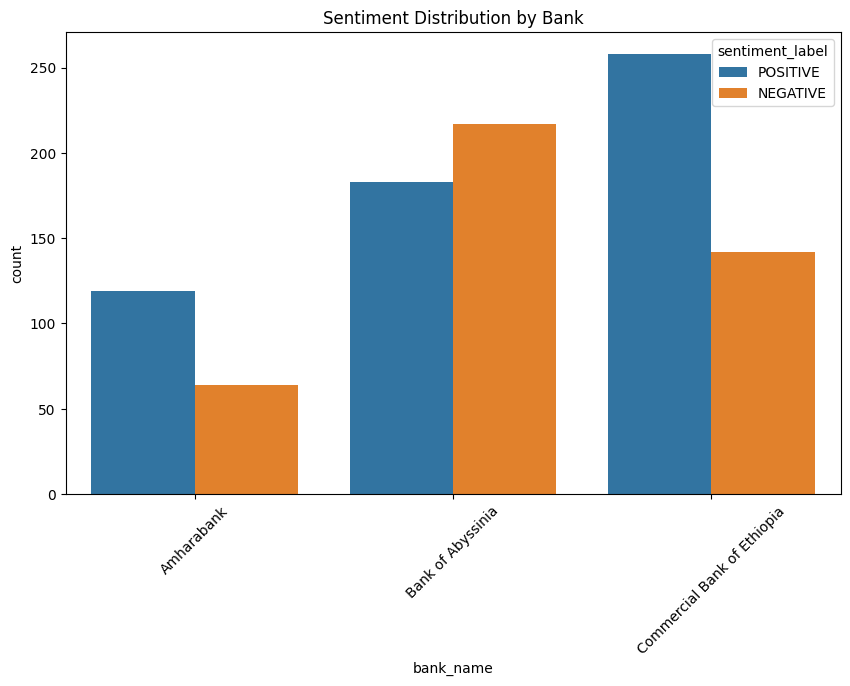

In [2]:
# Visualizations: Overall sentiment distribution, by bank
# Sentiment distribution by bank
plt.figure(figsize=(10,6))
sns.countplot(x='bank_name', hue='sentiment_label', data=df)
plt.title('Sentiment Distribution by Bank')
plt.xticks(rotation=45)
plt.show()
